In [65]:
import pandas as pd
import numpy as np
import requests
import json
from dotenv import load_dotenv
from langchain_groq import ChatGroq
import os

In [66]:
# Comando curl en bash es para comunicarnos con la API de la página, se comunica a traves de la dirección URL y los argumentos que se le pasan
# el formato de salida es en JSON que se puede traducir a un diccionario de python

In [67]:
# Crear diccionario con First Name, Last name, siblings.
diccionario = {'name': 'Richard', 'last_name': 'Rodriguez', 'siblings': 1, 'hobbies':'Cine'}
diccionario

{'name': 'Richard', 'last_name': 'Rodriguez', 'siblings': 1, 'hobbies': 'Cine'}

In [68]:
json.dumps(diccionario)

'{"name": "Richard", "last_name": "Rodriguez", "siblings": 1, "hobbies": "Cine"}'

In [69]:
json.dumps(diccionario, sort_keys=True)

'{"hobbies": "Cine", "last_name": "Rodriguez", "name": "Richard", "siblings": 1}'

In [70]:
result = '{"name": "Jonh", "last_name": "Connor", "siblings": 0}'
result_dict = json.loads(result)
result_dict

{'name': 'Jonh', 'last_name': 'Connor', 'siblings': 0}

In [71]:
url = 'https://api.open-meteo.com/v1/forecast'
params = {
    'latitude': 52.52,
    'longitude': 13.41,
    'current': "temperature_2m,wind_speed_10m",
    'hourly': "temperature_2m,relative_humidity_2m,wind_speed_10m"
}


In [72]:
api_call = requests.get(url, params=params)
api_call

<Response [200]>

In [73]:
if api_call.status_code == 200:
    data= api_call.json()
    print(data)
else:
    print(f'Failed: {api_call.status_code}')

{'latitude': 52.52, 'longitude': 13.419998, 'generationtime_ms': 0.10466575622558594, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 38.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C', 'wind_speed_10m': 'km/h'}, 'current': {'time': '2025-01-28T03:45', 'interval': 900, 'temperature_2m': 6.8, 'wind_speed_10m': 9.4}, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'relative_humidity_2m': '%', 'wind_speed_10m': 'km/h'}, 'hourly': {'time': ['2025-01-28T00:00', '2025-01-28T01:00', '2025-01-28T02:00', '2025-01-28T03:00', '2025-01-28T04:00', '2025-01-28T05:00', '2025-01-28T06:00', '2025-01-28T07:00', '2025-01-28T08:00', '2025-01-28T09:00', '2025-01-28T10:00', '2025-01-28T11:00', '2025-01-28T12:00', '2025-01-28T13:00', '2025-01-28T14:00', '2025-01-28T15:00', '2025-01-28T16:00', '2025-01-28T17:00', '2025-01-28T18:00', '2025-01-28T19:00', '2025-01-28T20:00', '2025-01-28T21:00', '2025-01-28T22:00', '2025-01

In [74]:
type(data)

dict

In [75]:
#Traer latitud
data['latitude']

52.52

In [76]:
#Traer lista de hourly
data['hourly']

{'time': ['2025-01-28T00:00',
  '2025-01-28T01:00',
  '2025-01-28T02:00',
  '2025-01-28T03:00',
  '2025-01-28T04:00',
  '2025-01-28T05:00',
  '2025-01-28T06:00',
  '2025-01-28T07:00',
  '2025-01-28T08:00',
  '2025-01-28T09:00',
  '2025-01-28T10:00',
  '2025-01-28T11:00',
  '2025-01-28T12:00',
  '2025-01-28T13:00',
  '2025-01-28T14:00',
  '2025-01-28T15:00',
  '2025-01-28T16:00',
  '2025-01-28T17:00',
  '2025-01-28T18:00',
  '2025-01-28T19:00',
  '2025-01-28T20:00',
  '2025-01-28T21:00',
  '2025-01-28T22:00',
  '2025-01-28T23:00',
  '2025-01-29T00:00',
  '2025-01-29T01:00',
  '2025-01-29T02:00',
  '2025-01-29T03:00',
  '2025-01-29T04:00',
  '2025-01-29T05:00',
  '2025-01-29T06:00',
  '2025-01-29T07:00',
  '2025-01-29T08:00',
  '2025-01-29T09:00',
  '2025-01-29T10:00',
  '2025-01-29T11:00',
  '2025-01-29T12:00',
  '2025-01-29T13:00',
  '2025-01-29T14:00',
  '2025-01-29T15:00',
  '2025-01-29T16:00',
  '2025-01-29T17:00',
  '2025-01-29T18:00',
  '2025-01-29T19:00',
  '2025-01-29T20:00',
  

In [77]:
df = pd.DataFrame(data['hourly'])
df

,time,temperature_2m,relative_humidity_2m,wind_speed_10m
0,2025-01-28T00:00,8.4,86,11.4
1,2025-01-28T01:00,7.9,86,8.4
2,2025-01-28T02:00,7.5,86,10.3
3,2025-01-28T03:00,6.9,88,9.7
4,2025-01-28T04:00,6.7,89,9.4
...,...,...,...,...
163,2025-02-03T19:00,0.7,76,4.6
164,2025-02-03T20:00,0.6,78,5.9
165,2025-02-03T21:00,0.5,79,6.9
166,2025-02-03T22:00,0.4,79,7.9


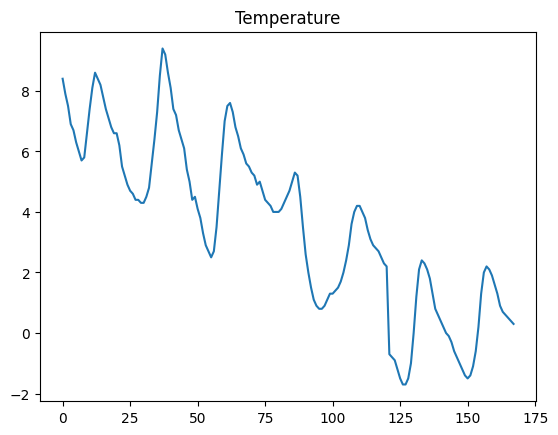

In [78]:
#graficar los datos restantes de la tabla con matplotlib
import matplotlib.pyplot as plt
plt.plot(df['temperature_2m'])
plt.title("Temperature")
plt.show()


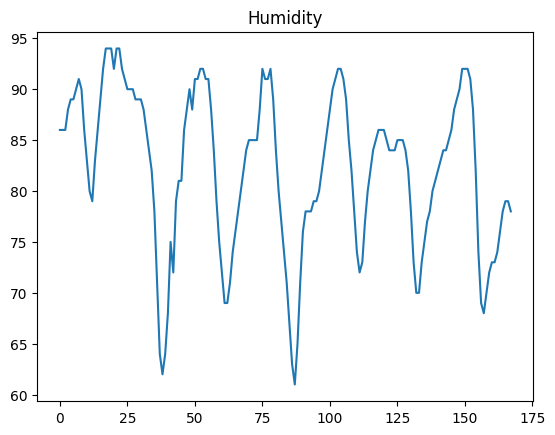

In [79]:
plt.plot(df['relative_humidity_2m'])
plt.title("Humidity")
plt.show()

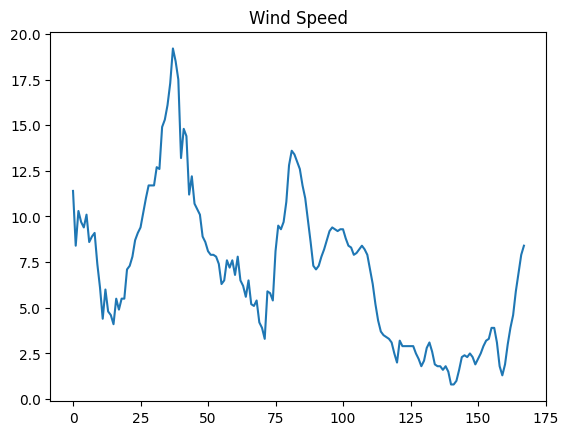

In [80]:
plt.plot(df['wind_speed_10m'])
plt.title("Wind Speed")
plt.show()

In [81]:
load_dotenv()

True

In [82]:
llm = ChatGroq(model_name="llama3-8b-8192")

In [83]:
message = [
    ("system", "you are a helpful assistant that translates English to Spanish. Translate the user sentence"), 
    ("human", "I love programming in Python")
]

In [84]:
msg_llm = llm.invoke(message)
print(msg_llm)

content='Te encantas programando en Python' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 35, 'total_tokens': 43, 'completion_time': 0.006666667, 'prompt_time': 0.00473601, 'queue_time': 0.022226789, 'total_time': 0.011402677}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6a6771ae9c', 'finish_reason': 'stop', 'logprobs': None} id='run-cce1cb86-f735-4ab7-8c3b-5047ee09c097-0' usage_metadata={'input_tokens': 35, 'output_tokens': 8, 'total_tokens': 43}


In [88]:
url = "https://api.groq.com/openai/v1/chat/completions" #API endpoint
api_key = os.getenv("GROQ_API_KEY") #API key
headers = {
  "Content-Type": "application/json", 
  "Authorization": f"Bearer {api_key}"
}
data = {
    "model": "llama3-8b-8192",
    "messages": [
        {"role": "user",
         "content": "who are The Beatles?"}
    ]
}
response = requests.post(url, headers=headers, json=data)
response

<Response [200]>

In [89]:
response_data = response.json()
print(response_data)

{'id': 'chatcmpl-add735b2-1f7c-4a7e-aa64-c03b14352919', 'object': 'chat.completion', 'created': 1738036767, 'model': 'llama3-8b-8192', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The Beatles!\n\nThe Beatles were a British rock band that formed in Liverpool, England in 1960. They are widely regarded as one of the most influential and successful bands in the history of popular music. The band consisted of four members:\n\n1. John Lennon (1940-1980) - rhythm guitar, keyboards, harmonica, and vocals\n2. Paul McCartney (born 1942) - bass guitar, piano, keyboards, and vocals\n3. George Harrison (1943-2001) - lead guitar, keyboards, and vocals\n4. Ringo Starr (born 1940) - drums, percussion, and vocals\n\nThe Beatles are known for their innovative music, cultural impact, and enduring legacy. They are often credited with transforming the music industry and popular culture in the 1960s. Here are some key highlights of their career:\n\n* Early years: The band began play